In [67]:
import pandas as pd
dados = pd.read_csv('athlete_events.csv')

In [39]:
dados.shape

(271116, 15)

In [68]:
dados.columns= ['ID', 'Nome','Sexo', 'Idade','Altura', 'Peso', 'Time','NOC','Jogos',
               'Ano','Estação','Cidade','Esporte','Evento','Medalha']

In [43]:
dados.head()

,ID,Nome,Sexo,Idade,Altura,Peso,Time,NOC,Jogos,Ano,Estação,Cidade,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

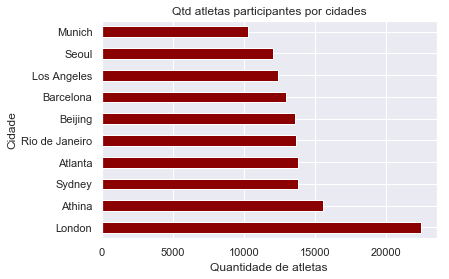

In [157]:
dados['Cidade'].value_counts().head(10).plot(kind='barh', color='darkred')
plt.title('Qtd atletas participantes por cidades')
plt.ylabel('Cidade')
plt.xlabel('Quantidade de atletas')
plt.show()

In [232]:
tipo_medalhas= dados['Medalha'].value_counts()
print(tipo_medalhas)

Gold      13372
Bronze    13295
Silver    13116
Name: Medalha, dtype: int64


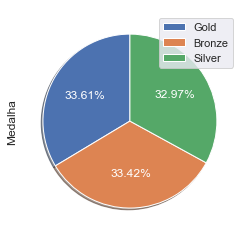

In [236]:
#Medalhas em porcentagem
tipo_medalhas.plot(kind='pie', autopct='%1.2f%%', shadow=True, startangle=90, textprops=dict(color="w"), legend=True)
plt.show()

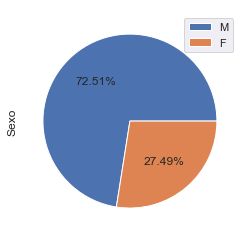

In [229]:
#Sexo em porcentagem
s= dados['Sexo'].value_counts()
s.plot(kind='pie', autopct='%1.2f%%',legend=True, labels=None)
plt.show()


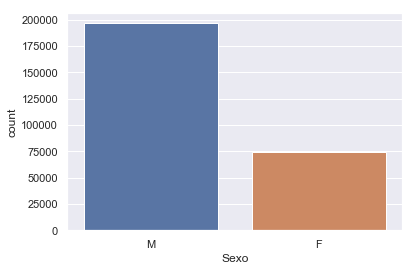

In [218]:
#Sexo em qtds
sns.set(style='darkgrid')
grafico= sns.countplot(x='Sexo', data=dados)



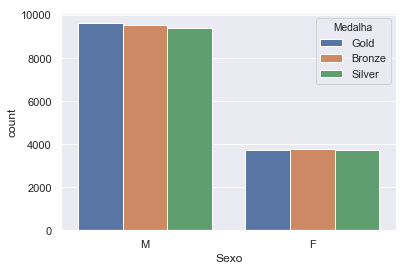

In [230]:
#Tipos Medalhas por sexo
grafico1= sns.countplot(x='Sexo', hue='Medalha', data=dados)

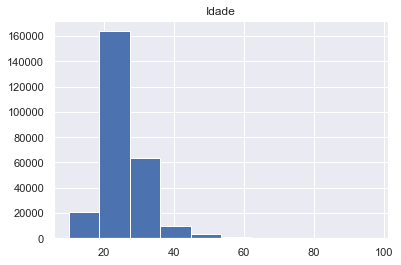

In [125]:
dados.hist(column='Idade')
plt.show()

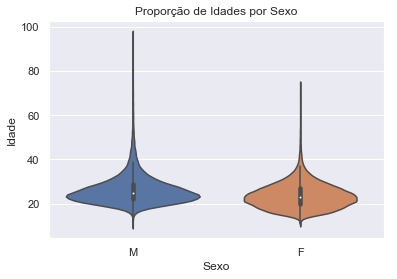

In [139]:
#Grafico Violino
sns.violinplot(data=dados, x='Sexo', y='Idade', size=10)
plt.title('Proporção de Idades por Sexo')
plt.show()

In [83]:
crosstab_md= pd.crosstab(dados['Cidade'], dados['Medalha'])
crosstab_md.head(10)

Medalha,Bronze,Gold,Silver
Cidade,,,
Albertville,106,104,108
Amsterdam,250,245,239
Antwerpen,367,493,448
Athina,860,883,859
Atlanta,629,608,605
Barcelona,604,559,549
Beijing,710,671,667
Berlin,295,312,310
Calgary,88,87,88


In [84]:
#somando medalha por cidade
crosstab_md['Total']=crosstab_md.sum(axis=1)
crosstab_md.head()

Medalha,Bronze,Gold,Silver,Total
Cidade,,,,
Albertville,106,104,108,318
Amsterdam,250,245,239,734
Antwerpen,367,493,448,1308
Athina,860,883,859,2602
Atlanta,629,608,605,1842


In [100]:
top10_cidade= crosstab_md[crosstab_md['Total']>1000].sort_values('Total', ascending=False)
print(top10_cidade)

Medalha         Bronze  Gold  Silver  Total
Cidade                                     
London            1214  1215    1195   3624
Athina             860   883     859   2602
Los Angeles        706   726     691   2123
Beijing            710   671     667   2048
Rio de Janeiro     703   665     655   2023
Sydney             680   663     661   2004
Atlanta            629   608     605   1842
Barcelona          604   559     549   1712
Seoul              549   520     513   1582
Paris              449   478     509   1436
Moskva             469   457     458   1384
Montreal           448   438     434   1320
Antwerpen          367   493     448   1308
Munich             419   404     392   1215
Mexico City        358   359     340   1057
Tokyo              343   347     339   1029


In [95]:
#mapa de calor
#sns.set(font_scale=1)
#plt.figure(figsize=(18,9))
#sns.heatmap(top10_cidade, annot=True, vmax=top10_cidade.loc[:'Tokyo', :'Silver'].values.max(), vmin=top10_cidade.loc[:, :'Silver'].values.min(), fmt='d')
#plt.title('Quantidade de Medalhas por cidade')
#plt.xlabel('Cidade')
#plt.ylabel('Medalha')
#plt.show()

In [149]:
#Proporção de Medalhas por Sexo
#Medalha Bronze
bronze= dados['Medalha']=='Bronze'
bronze.value_counts()

False    257821
True      13295
Name: Medalha, dtype: int64